## Visualize a Sympy Expression Graph

The library `anytree` is used. See https://anytree.readthedocs.io/en/latest/

In [1]:
import time
print(time.ctime())

import sympy as sp
from sympy import sin, cos, exp, sqrt, atan2, atan
from sympy.interactive import printing
printing.init_printing()


import anytree # for tree visualizing
from anytree import Node, exporter
from IPython.core.display import Image, display


Mon Feb 24 19:22:55 2020


In [2]:
w1, w2 = sp.symbols("w1, w2")

In [3]:
def crawl(expr, func, *args, **kwargs):
    """
    Crawl the expression tree, and apply func to every node.
    
    original source: https://jcrist.github.io/gsoc-week-7.html (Jim Crist, Sun 06 July 2014)
    modified by C. Knoll (2020-02-24)
    
    :param expr:
    :param func: function that gets applied to all leaves
    
    :return: expr after traversion
    
    func should return (None, node) if the current leave (i.e. `expr`) has childs
    and (val, Node) if this is the end of the branch of the tree.
    """
    val, node = func(expr, *args, **kwargs)
    if val is not None:
        return val
    new_args = (crawl(arg, func, node, **kwargs) for arg in expr.args)
    return expr.func(*new_args)


def get_short_name(sp_func):
    """
    convert <class 'sympy.core.add.Add'>    to   Add
    """
    return str(sp_func.mro()[0]).split(".")[-1].replace("'>", "")

def get_node_str(expr):
    """
    return either direct representation of expr or the name of the operator (if expr has childs)
    """
    
    if not expr.args:
        return repr(expr)
    else:
        return get_short_name(expr.func)


def make_tree(expr, parent):
    """Print out every node"""
    n = Node(get_node_str(expr), parent=parent)
    if not expr.args:
        return expr, n
    else:
        return None, n
    
def visualize_expression(expr, mode="txt", fname="tmp_graph.png"):
    """
    visualize a sympy expression graph either in text-mode or graphically
    """
    root = Node("root")
    crawl(expr, make_tree, root)
    
    if mode == "txt":
        for pre, fill, node in anytree.RenderTree(root):
            print("%s%s" % (pre, node.name))
            
    else:
        anytree.exporter.DotExporter(root).to_picture(fname)
        display(Image(filename=fname))
    
    return root


In [4]:
z = w1 + w2**2 - 7

In [5]:
r = visualize_expression(z)

root
└── Add
    ├── -7
    ├── w1
    └── Pow
        ├── w2
        └── 2


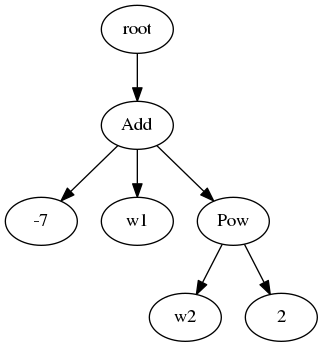

Node('/root')

In [6]:
# this needs graphviz to be installed: https://graphviz.org/download/

visualize_expression(z, mode="img")